In [1]:

import numpy as np 
import sys

    
import xarray as xr 
import matplotlib.pyplot as plt 
#import re 
import matplotlib.dates as mdates 
print("Modules imported")



Modules imported


In [2]:
# velocity = data.horizontalVelX.isel(time=40, nSCHISM_vgrid_layers=0).values

import re 
file="/global/scratch/users/jennaisrael/run_schism/run_16/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))



263
240
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Old River at Coney Island
4 == Clifton Court
5 == Discovery Bay at Indian Slough
6 == Doughty Cut above Grant Line Canal
7 == Sacramento River at Emmaton
8 == EMM upper Emmaton
9 == EMM lower Emmaton
10 == Farrar Park
11 == Grant Line Canal at Tracy Rd Bridge
12 == Green's Landing
13 == Harvey O Banks PP
14 == Holland Tract
15 == Harvey O Banks PP
16 == CCWD Old River near Discovery Bay
17 == CCWD Rock Slough PP
18 == Italian Slough Headwater near Byron
19 == Jersey Point
20 == Sacramento River at Mallard Island
21 == Sacramento River at Mallard Island
22 == Middle River at Howard Rd Bridge
23 == San Joaquin at Mossdale Bridge
24 == Middle River at Tracy Blvd
25 == Old River Barrier near DMC (Above)
26 == Old River below Dam
27 == Old River at Bacon Island
28 == Old River at Head
29 == Old River at Byron
30 == Prisoners Point
31 == Rock Slough at Contra Costa Canal
32 == San Andreas Landin

In [3]:
import pandas as pd

columns = ['time']
stations_no = [str(i) for i in range(263)]
columns = columns + stations_no



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs/staout_1"
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("02-16-2018 00:00") + i for i in timedelta]
    
data["time"] = timestamp


Axes(0.125,0.11;0.775x0.77)


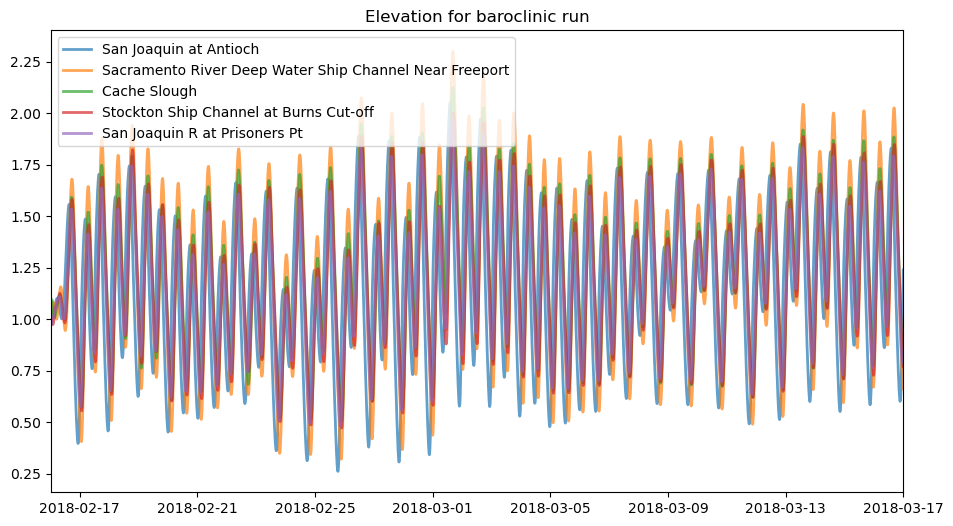

In [4]:
# Make a plot
plt.ioff()

station_indices=[0, 208, 2, 62, 105]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Elevation for baroclinic run")
plt.show()
# ax.grid()


In [5]:
stations

['San Joaquin at Antioch',
 "Mokelumne River at Benson's Ferry",
 'Cache Slough',
 'Old River at Coney Island',
 'Clifton Court',
 'Discovery Bay at Indian Slough',
 'Doughty Cut above Grant Line Canal',
 'Sacramento River at Emmaton',
 'EMM upper Emmaton',
 'EMM lower Emmaton',
 'Farrar Park',
 'Grant Line Canal at Tracy Rd Bridge',
 "Green's Landing",
 'Harvey O Banks PP',
 'Holland Tract',
 'Harvey O Banks PP',
 'CCWD Old River near Discovery Bay',
 'CCWD Rock Slough PP',
 'Italian Slough Headwater near Byron',
 'Jersey Point',
 'Sacramento River at Mallard Island',
 'Sacramento River at Mallard Island',
 'Middle River at Howard Rd Bridge',
 'San Joaquin at Mossdale Bridge',
 'Middle River at Tracy Blvd',
 'Old River Barrier near DMC (Above)',
 'Old River below Dam',
 'Old River at Bacon Island',
 'Old River at Head',
 'Old River at Byron',
 'Prisoners Point',
 'Rock Slough at Contra Costa Canal',
 'San Andreas Landing',
 'San Joaquin River Mccune Station near Vernalis',
 'Mokelumne

In [6]:
file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs/staout_5"
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("02-16-2018 00:00") + i for i in timedelta]
    
data["time"] = timestamp


Axes(0.125,0.11;0.775x0.77)


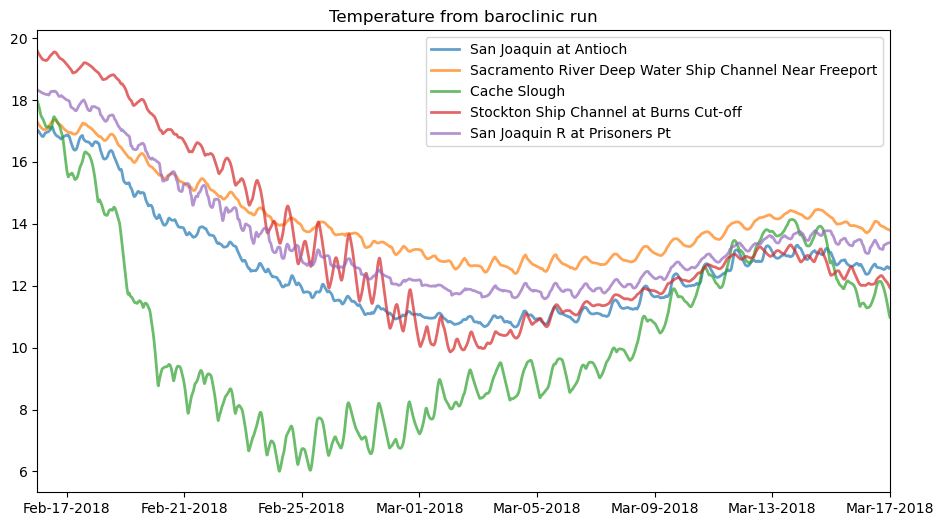

In [7]:

station_indices=[0, 208, 2, 62, 105]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Temperature from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

In [8]:
# pip install cartopy

In [9]:
hgrid =xr.open_dataset("//global/scratch/users/jennaisrael/run_schism/run_8/hgrid.nc")
hgrid.head()

/global/home/users/jennaisrael/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:75: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
ERROR 1: PROJ: proj_create_from_database: Open of /global/software/sl-7.x86_64/modules/langs/python/3.10/share/proj failed


<xarray.Dataset> Size: 940B
Dimensions:            (n_hgrid_node: 5, n_hgrid_face: 5, n_face_node: 4,
                        n_hgrid_edge: 5, two: 2, n_vgrid_layers: 5)
Dimensions without coordinates: n_hgrid_node, n_hgrid_face, n_face_node,
                                n_hgrid_edge, two, n_vgrid_layers
Data variables: (12/15)
    hgrid_node_x       (n_hgrid_node) float64 40B ...
    hgrid_node_y       (n_hgrid_node) float64 40B ...
    hgrid_contour_x    (n_hgrid_face, n_face_node) float64 160B ...
    hgrid_contour_y    (n_hgrid_face, n_face_node) float64 160B ...
    depth              (n_hgrid_node) float64 40B ...
    hgrid_face_nodes   (n_hgrid_face, n_face_node) int32 80B ...
    ...                 ...
    hgrid_edge_x       (n_hgrid_edge) float64 40B ...
    hgrid_edge_y       (n_hgrid_edge) float64 40B ...
    node_bottom_index  (n_hgrid_node) int64 40B ...
    ele_bottom_index   (n_hgrid_face) int64 40B ...
    edge_bottom_index  (n_hgrid_edge) int64 40B ...
    z                  (n_hgrid_node, n_vgrid_layers) float32 100B ...
Attributes:
    long_name:      node x-coordinate
    standard_name:  latitude
    units:          degrees_east
    mesh:           SCHISM_hgrid
    location:       node

AttributeError: 'Dataset' object has no attribute 'x'

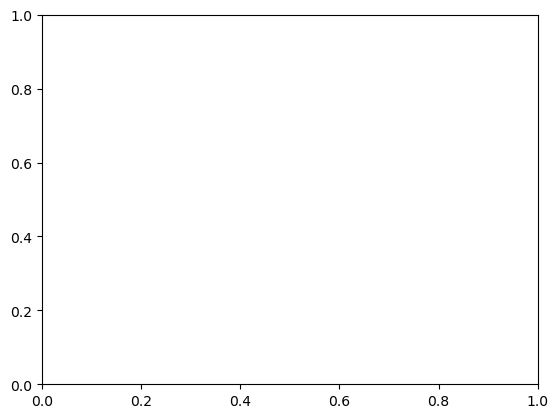

In [10]:
# hgrid.make_plot(show=True)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.collections import PolyCollection
# axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
# plt.tricontour(hgrid.x, hgrid.y,hgrid.triangles, velocity, levels=10)

fig = plt.figure() 
ax = plt.gca()
ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, velocity+100, shading='flat', vmin=0, vmax = 0.4)

pc = PolyCollection(hgrid.coords[hgrid.quads])
# quad_value = np.mean(self.values[self.quads], axis=1)
# pc.set_array(quad_value)
pc.set_array(velocity)
ax.add_collection(pc)
            
            
# hgrid.quadface(ax=ax)
ax.set_xlim(550000, 650000)
# ax.axis([550000, 650000, 4.14e6, 4.3e6])
ax.axis("scaled")
cbar = plt.colorbar(pc, orientation="horizontal")
# hgrid.triplot()
# tricontourf(self, axes=None, show=True, figsize=None, **kwargs):
#         if len(self.triangles) > 0:
#             axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
#         return axes